In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
df_calendar = pd.read_csv('./data/calendar.csv')
df_listings = pd.read_csv('./data/listings.csv')
df_reviews = pd.read_csv('./data/reviews.csv')

df_calendar.shape, df_listings.shape, df_reviews.shape

((1393570, 4), (3818, 92), (84849, 6))

## 1. Which month has the highest availability of listings?

In [3]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [5]:
df_calendar.isna().mean() #check if there is any missing value in the dataset

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [6]:
df_calendar.groupby('listing_id').count() #count the number of data for each listing in the calendar dataframe

,date,available,price
listing_id,,,
3335,365,365,309
4291,365,365,365
5682,365,365,309
6606,365,365,365
7369,365,365,53
...,...,...,...
10332096,365,365,365
10334184,365,365,361
10339144,365,365,0


In [7]:
df_calendar.groupby('listing_id').count()['date'].mean() #check how many dates are available for each listing

365.0

In [8]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format="%Y/%m/%d") #convert date object to datatime type

In [9]:
df_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [10]:
df_calendar.groupby('listing_id').date.min()

listing_id
3335       2016-01-04
4291       2016-01-04
5682       2016-01-04
6606       2016-01-04
7369       2016-01-04
              ...    
10332096   2016-01-04
10334184   2016-01-04
10339144   2016-01-04
10339145   2016-01-04
10340165   2016-01-04
Name: date, Length: 3818, dtype: datetime64[ns]

In [11]:
df_calendar.groupby('listing_id').date.min().dt.date.duplicated(keep=False).mean() #check if all listing has the same start date

1.0

In [12]:
df_calendar.groupby('listing_id').date.max()

listing_id
3335       2017-01-02
4291       2017-01-02
5682       2017-01-02
6606       2017-01-02
7369       2017-01-02
              ...    
10332096   2017-01-02
10334184   2017-01-02
10339144   2017-01-02
10339145   2017-01-02
10340165   2017-01-02
Name: date, Length: 3818, dtype: datetime64[ns]

In [13]:
df_calendar.groupby('listing_id').date.max().dt.date.duplicated(keep=False).mean() #check if all listing has the same end date

1.0

In [14]:
# Split the date into year, month, date and add extra columns for each of them
df_calendar['year'] = df_calendar['date'].dt.year
df_calendar['month'] = df_calendar['date'].dt.month
df_calendar['day'] = df_calendar['date'].dt.day

In [15]:
df_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
year                   int64
month                  int64
day                    int64
dtype: object

In [16]:
# Choose only the available listings
df_available_listing = df_calendar[df_calendar.available=='t'].copy()
df_available_listing_counts = df_available_listing.groupby('month').count()
df_available_listing_counts

,listing_id,date,available,price,year,day
month,,,,,,
1,64937,64937,64937,64937,64937,64937
2,73321,73321,73321,73321,73321,73321
3,83938,83938,83938,83938,83938,83938
4,76037,76037,76037,76037,76037,76037
5,79971,79971,79971,79971,79971,79971
6,77244,77244,77244,77244,77244,77244
7,74222,74222,74222,74222,74222,74222
8,76347,76347,76347,76347,76347,76347
9,77246,77246,77246,77246,77246,77246


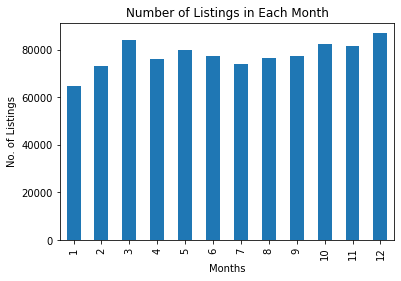

In [17]:
# Group the available listings by month and plot the number of listings in each month in a bar chart
ax = df_available_listing_counts.plot.bar(y='listing_id', legend=False)
ax.set_xlabel('Months');
ax.set_ylabel('No. of Listings');
ax.set_title('Number of Listings in Each Month');